In [7]:
from tensorflow.keras.layers import Dense  # ← 匯入 Keras 的密集層類別
from tensorflow.keras.models import Sequential  # ← 匯入 Keras 的序列式模型類別
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
import sys
import numpy as np

In [8]:
#(train2_images, train2_labels), (test2_images, test2_labels) = mnist.load_data()

In [9]:
print(sys.version)  #打印出我們現在使用的Python版本
print(tf.__version__) #打印出tensorflow版本號
#cwd = os.getcwd() #獲得現在所在的檔案路徑
print(cwd)
os.chdir('D:/DL-37114') #變更現在所在的檔案路徑成為 /Users/luruishan，同學練習時可以改為"D:\"
print(os.getcwd()) #重新獲得一次現在所在的檔案路徑

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
2.5.1


NameError: name 'cwd' is not defined

In [12]:
# 載入 MNIST 資料集

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

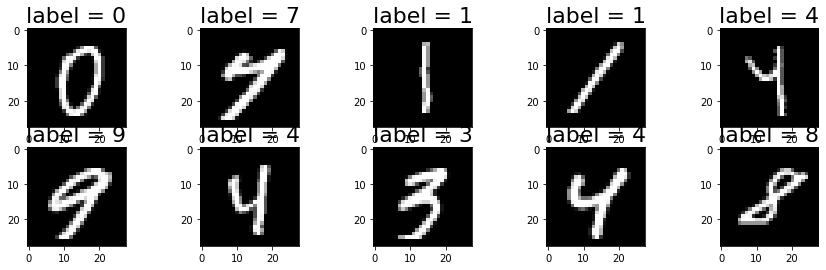

In [ ]:
# 畫出手寫數字圖片

plt.gcf( ).set_size_inches(15, 4)# ←設定圖形的寬和高 (英吋)
for i in range(10):
    ax = plt.subplot(2, 5, 1+i)  # ←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(train_images[i+1000], cmap='gray')  # ←顯示灰階圖片(黑底白字)
    ax.set_title('label = '+str(train_labels[i+1000]), fontsize=22)  # ←設定標題
plt.show()  # 將圖形顯示出來

In [18]:
# 前處理/預處理訓練資料
# ←將 (60000,28,28) 轉換成 (60000,784)
x_train = train_images.reshape((60000, 784))
x_train = x_train.astype('float32') / 255  # ←再將 0~255 的像素值轉換成 0~1 的浮點數

x_test = test_images.reshape((10000, 784))  # }←將 10000 筆測試樣本做同樣的轉換
x_test = x_test.astype('float32') / 255  # }
print(x_train.shape)
print(x_train[0].shape)

(60000, 784)
(784,)


In [13]:
# 前處理/預處理標籤資料

y_train = to_categorical(train_labels)  # ←將標籤做 One-hot 編碼
y_test = to_categorical(test_labels)  # ←將測試做 One-hot 編碼


In [15]:
# 程 建立多元分類模型

model = Sequential()  # ← 建立序列模型物件
model.add(Dense(512, activation='relu', input_dim=784))  # ← 加入第一層
model.add(Dense(10, activation='softmax'))  # ← 加入第二層
model.compile(optimizer='rmsprop',  # ← 指定優化器
              loss='categorical_crossentropy',  # ← 指定損失函數
              metrics=['acc'])  # ← 指定評量準則

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 程 訓練模型
history = model.fit(x_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 5ms/step - loss: 0.3966 - acc: 0.8858
Epoch 2/10
120/120 [==============================] - 1s 6ms/step - loss: 0.1726 - acc: 0.9502
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1172 - acc: 0.9658
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0867 - acc: 0.9748
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0679 - acc: 0.9801
Epoch 6/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0536 - acc: 0.9846
Epoch 7/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0429 - acc: 0.9878
Epoch 8/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0360 - acc: 0.9900
Epoch 9/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0285 - acc: 0.9925
Epoch 10/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0235 - acc: 0.9940


In [20]:
history.history

{'loss': [0.3965722322463989,
  0.17257872223854065,
  0.11716675013303757,
  0.0866684839129448,
  0.0679427906870842,
  0.05361693352460861,
  0.04289522022008896,
  0.03596341237425804,
  0.028500918298959732,
  0.023454315960407257],
 'acc': [0.8857666850090027,
  0.950166642665863,
  0.9657666683197021,
  0.9748166799545288,
  0.9800833463668823,
  0.9846166372299194,
  0.9878000020980835,
  0.9899500012397766,
  0.9925000071525574,
  0.9940166473388672]}

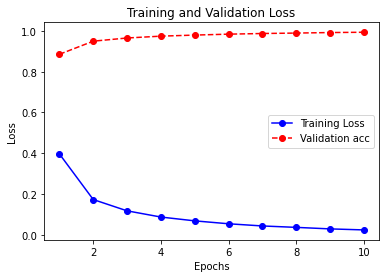

In [21]:
#---- 以圖表來分析模型的訓練過程
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
acc = history.history["acc"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, acc, "ro--", label="Validation acc")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)  # ←使用測試樣本及標籤來評估普適能力
print('對測試資料集的準確率：', test_acc)

313/313 [==============================] - 0s 705us/step - loss: 0.1259 - acc: 0.9842
對測試資料集的準確率： 0.9842000007629395


In [ ]:
model.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

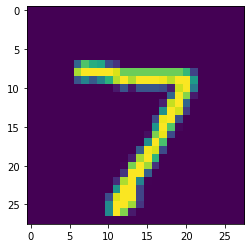

In [ ]:
plt.imshow(test_images[0])

In [ ]:
# ←用測試樣本進行預測 傳入值必須有批次範圍 可以單張圖片 但是要以批次迭代表示法 例如：x_test[0:1] 來表示單張圖片
# predict = model.predict_classes(x_test[0:1]) 已廢棄過時不要用
predict =np.argmax(model.predict(x_test[0:1]), axis=-1)
predict2 = model.predict(x_test[0:1])
print(predict)
print(predict2)
print(np.argmax(predict2))


[7]
[[4.1508879e-27 1.0492048e-34 1.7825028e-22 1.4031428e-15 7.6294053e-36
  5.5138811e-28 0.0000000e+00 1.0000000e+00 2.9519113e-26 1.3262465e-22]]
7


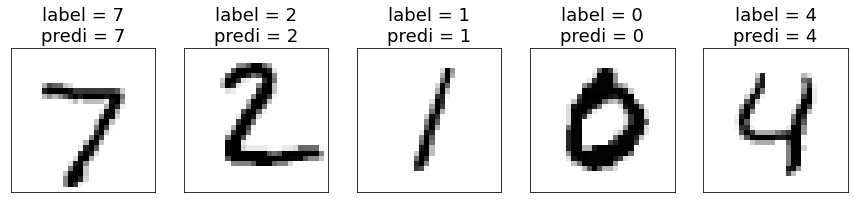

In [ ]:
# 程 畫出測試圖片並標示預測結果與標準答案

predict = np.argmax(model.predict(x_test), axis=-1)  # ←用測試樣本進行預測
predict2 = model.predict(x_test)

plt.gcf().set_size_inches(15, 4)  # ←設定圖形的尺吋
for i in range(5):
    ax = plt.subplot(1, 5, 1+i)  # ←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(test_images[i], cmap='binary')  # ←顯示灰階圖片
    ax.set_title('label = '+str(test_labels[i]) +
                 '\npredi = '+str(predict[i]), fontsize=18)  # ←設定標題
    ax.set_xticks([])
    ax.set_yticks([])  # ←X, Y 軸不顯示刻度
plt.show()  # ←將圖形顯示出來

In [ ]:
# 程 將模型存檔
model.save('MnistModel.h5')   #← 將模型以指定的檔名存檔


In [ ]:
print(predict.shape)
print(test_labels.shape)

(10000,)
(10000,)


In [ ]:
#做出 測試集的預測結果與原始標籤的交叉比對表 共10000筆資料
import pandas as pd
pd.crosstab(test_labels, predict,rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,0,1,1,2,1,1,0
1,0,1127,1,1,0,1,2,1,2,0
2,3,1,1013,1,1,0,2,3,7,1
3,0,0,3,995,0,3,0,2,3,4
4,2,0,2,1,965,0,3,2,1,6
5,2,0,0,7,1,873,4,1,2,2
6,3,2,0,1,3,5,944,0,0,0
7,0,1,8,2,1,0,0,1009,3,4
8,0,0,4,3,4,1,1,2,954,5


In [ ]:
# 預測結果與原始標籤的交叉比對表 輸出為html檔
crosstab_result = pd.crosstab(test_labels, predict,rownames=["label"], colnames=["predict"])
crosstab_result.to_html("mnist_crosstab.html")